Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

Importing white wine dataset

In [2]:
df_w = pd.read_csv('/Users/edward/Downloads/wine+quality/winequality-white.csv', delimiter=';')

Importing red wine dataset

In [3]:
df_r = pd.read_csv('/Users/edward/Downloads/wine+quality/winequality-red.csv', delimiter=';')

Overview of dataset features

In [4]:
df_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df_w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
df_w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
df_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df_r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df_w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
print(df_r.dtypes)
print(df_w.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [12]:
print(df_r.isnull().sum())
print(df_w.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Identifying correlations between features

In [13]:
corr_r = df_r.corr()

In [14]:
corr_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [15]:
corr_w = df_w.corr()

In [16]:
corr_w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Visualising correlations between features

<Axes: >

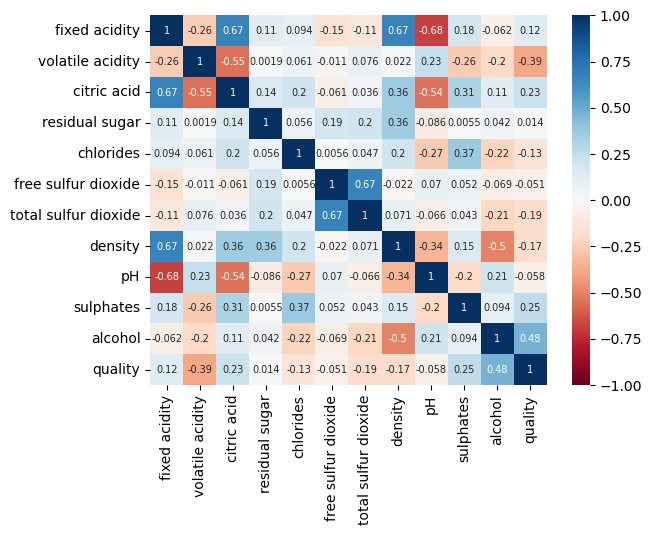

In [17]:
sns.heatmap(corr_r, cmap='RdBu', vmin=-1, vmax=1, annot=True,
           annot_kws={'fontsize':7})

<Axes: >

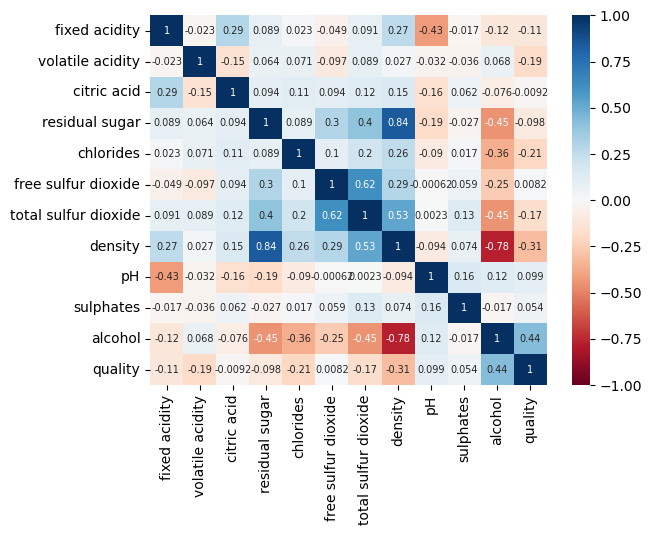

In [18]:
sns.heatmap(corr_w, cmap='RdBu', vmin=-1, vmax=1, annot=True,
           annot_kws={'fontsize':7})

Boxplot for red wine

{'whiskers': [<matplotlib.lines.Line2D at 0x143f7c950>,
 'caps': [<matplotlib.lines.Line2D at 0x143f7dc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x143f2fa50>,
 'medians': [<matplotlib.lines.Line2D at 0x143f7ed90>,
 'fliers': [<matplotlib.lines.Line2D at 0x143f2f790>,
 'means': []}

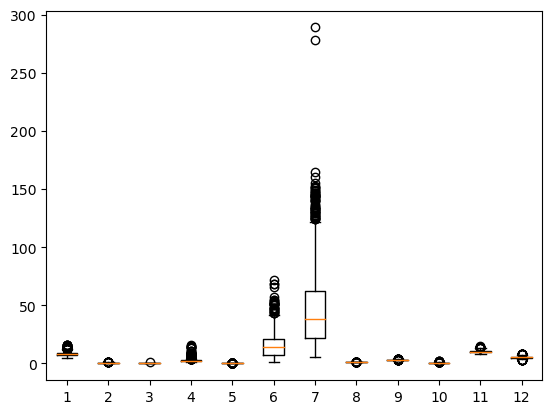

In [19]:
plt.boxplot(df_r)

Boxplot for white wine

{'whiskers': [<matplotlib.lines.Line2D at 0x1440c2b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1440c3e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1440c22d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1440e0fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1440e1a50>,
 'means': []}

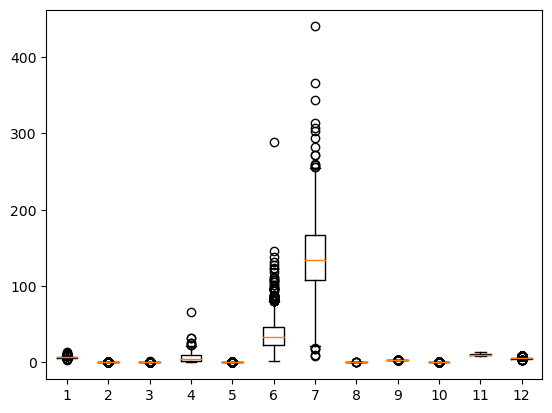

In [20]:
plt.boxplot(df_w)

Removing outliers

In [21]:
q1 = df_w['total sulfur dioxide'].quantile(0.25)
q3 = df_w['total sulfur dioxide'].quantile(0.75)

iqr = q3-q1

filter = (df_w['total sulfur dioxide'] >= q1 - 1.5 * iqr) & (df_w['total sulfur dioxide'] <= q3 + 1.5*iqr)

df_white = df_w.loc[filter]

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [22]:
q_1 = df_r['total sulfur dioxide'].quantile(0.25)
q_3 = df_r['total sulfur dioxide'].quantile(0.75)

i_q_r = q_3-q_1

filter = (df_r['total sulfur dioxide'] >= q_1 - 1.5 * i_q_r) & (df_r['total sulfur dioxide'] <= q_3 + 1.5*i_q_r)

df_red = df_r.loc[filter]

df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Boxplot for white wine, outliers removed

{'whiskers': [<matplotlib.lines.Line2D at 0x1442064d0>,
 'caps': [<matplotlib.lines.Line2D at 0x144230090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1442225d0>,
 'medians': [<matplotlib.lines.Line2D at 0x144231190>,
 'fliers': [<matplotlib.lines.Line2D at 0x144223650>,
 'means': []}

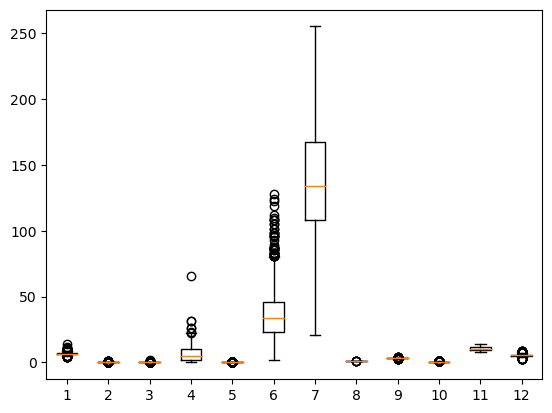

In [23]:
plt.boxplot(df_white)

Boxplot for red wine, outliers removed

{'whiskers': [<matplotlib.lines.Line2D at 0x14434b810>,
 'caps': [<matplotlib.lines.Line2D at 0x14435cf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x144325b10>,
 'medians': [<matplotlib.lines.Line2D at 0x14435e010>,
 'fliers': [<matplotlib.lines.Line2D at 0x14435ea50>,
 'means': []}

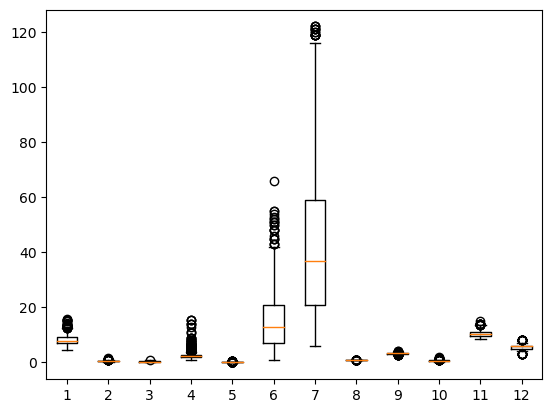

In [24]:
plt.boxplot(df_red)

Analysing correlations between features without outliers

<Axes: >

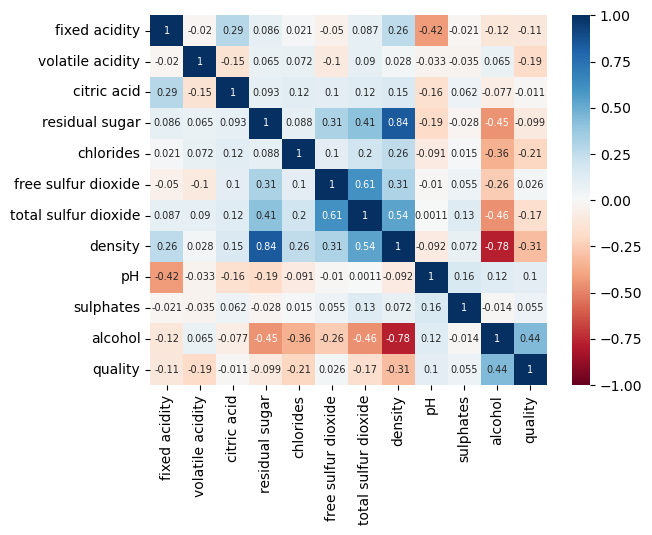

In [25]:
corr_white = df_white.corr()

sns.heatmap(corr_white, cmap='RdBu', vmin=-1, vmax=1, annot=True,
           annot_kws={'fontsize':7})

<Axes: >

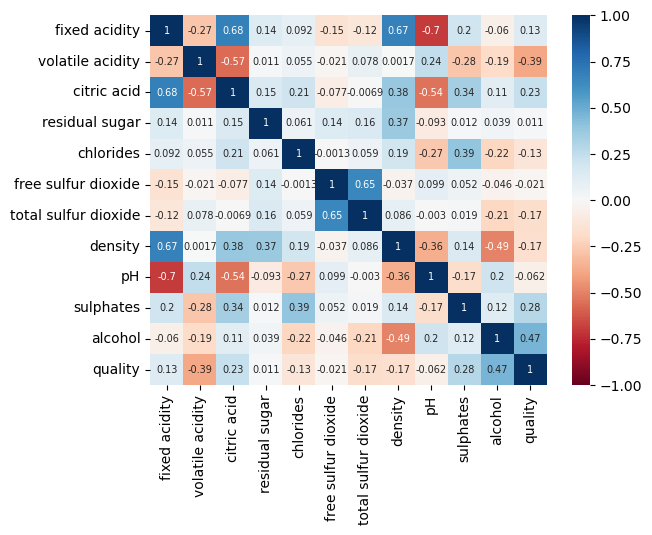

In [26]:
corr_red = df_red.corr()

sns.heatmap(corr_red, cmap='RdBu', vmin=-1, vmax=1, annot=True,
           annot_kws={'fontsize':7})

Finding mean quality for each dataset

In [65]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6423.000000,6423.000000,6423.000000,6423.000000,6423.000000,6423.000000,6423.000000,6423.000000,6423.000000,6423.000000,6423.000000,6423.000000
mean,7.207590,0.337669,0.318367,5.456850,0.055783,30.402771,115.176631,0.994676,3.218572,0.529648,10.497047,5.827184
std,1.295637,0.163132,0.144860,4.767566,0.035005,17.312847,55.932203,0.002997,0.160872,0.144530,1.193116,0.871195
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992300,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994820,3.210000,0.500000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996920,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,128.000000,255.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [66]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000
mean,6.852705,0.277893,0.333989,6.389998,0.045778,35.191945,138.018344,0.994024,3.188379,0.489688,10.514466,5.882558
std,0.839818,0.100493,0.120243,5.071840,0.021867,16.383061,41.393968,0.002988,0.150818,0.114118,1.229060,0.881883
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,21.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,128.000000,255.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [67]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,8.329016,0.526558,0.269003,2.508128,0.087398,15.269106,42.997409,0.996737,3.313983,0.655920,10.442001,5.652202
std,1.760777,0.178419,0.196008,1.351175,0.047663,9.862747,27.214797,0.001887,0.154313,0.157371,1.070150,0.812345
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995580,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.635000,0.422500,2.600000,0.090000,21.000000,59.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,66.000000,122.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Combining the datasets

In [58]:
wine_df = pd.concat([df_white, df_red])

In [59]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


KNN (scaled)

In [29]:
wine_df.shape

(6497, 12)

In [30]:
wine_df['quality'] = wine_df['quality'].astype(int)

In [60]:
x = np.array(wine_df[['fixed acidity', 'density']])
y = np.array(wine_df['quality'])

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

data = np.array([6497,2])

prediction = clf.predict(data.reshape(1, -1))

print(prediction)

0.7178741955574008
0.46077210460772106
[5]


Scaled Red Wine KNN

In [33]:
df_red.shape

(1544, 12)

In [35]:
r_x = np.array(df_red[['fixed acidity', 'density']])
r_y = np.array(df_red['quality'])

scaler = StandardScaler()
scaled_r_x = scaler.fit_transform(r_x)


x_train, x_test, y_train, y_test = train_test_split(scaled_r_x, r_y, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

data = np.array([1544,2])

r_prediction = clf.predict(data.reshape(1, -1))

print(r_prediction)

0.7262521588946459
0.4844559585492228
[5]


Scaled White WIne KNN

In [36]:
df_white.shape

(4879, 12)

In [38]:
w_x = np.array(df_white[['fixed acidity', 'density']])
w_y = np.array(df_white['quality'])

scaler = StandardScaler()
scaled_w_x = scaler.fit_transform(w_x)

x_train, x_test, y_train, y_test = train_test_split(scaled_w_x, w_y, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

data = np.array([4879,2])

w_prediction = clf.predict(data.reshape(1, -1))

print(w_prediction)

0.7258813883574747
0.4745901639344262
[3]


Scaled SVC

In [61]:
x = np.array(wine_df[['fixed acidity', 'density']])
y = np.array(wine_df['quality'])

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, random_state=42)

svm = SVC(kernel='rbf')

svm.fit(x_train,y_train)

print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

data = np.array([6497,2])

prediction_svm = svm.predict(data.reshape(1, -1))


0.46875648744031556
0.46201743462017436


In [62]:
print(prediction_svm)

[6]


Red Wine SVC (scaled)

In [47]:
r_x = np.array(df_red[['fixed acidity', 'density']])
r_y = np.array(df_red['quality'])

scaler = StandardScaler()
scaled_r_x = scaler.fit_transform(r_x)

x_train, x_test, y_train, y_test = train_test_split(scaled_r_x, r_y, random_state=42)

svm = SVC(kernel='rbf')

svm.fit(x_train,y_train)

print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

data = np.array([1544,2])

prediction_r_svm = svm.predict(data.reshape(1, -1))

0.5077720207253886
0.5025906735751295


In [48]:
print(prediction_r_svm)

[6]


White Scaled SVC (scaled)

In [49]:
w_x = np.array(df_white[['fixed acidity', 'density']])
w_y = np.array(df_white['quality'])

scaler = StandardScaler()
scaled_w_x = scaler.fit_transform(w_x)

x_train, x_test, y_train, y_test = train_test_split(scaled_w_x, w_y, random_state=42)

svm = SVC(kernel='rbf')

svm.fit(x_train,y_train)

print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

data = np.array([4879,2])

prediction_w_svm = svm.predict(data.reshape(1, -1))

0.46242142661929486
0.47540983606557374


In [50]:
print(prediction_w_svm)

[6]


Naive Bayes (not scaled)

In [63]:
x = np.array(wine_df[['fixed acidity', 'density']])
y = np.array(wine_df['quality'])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

clf_nb = GaussianNB()
clf_nb.fit(x,y)

GaussianNB(priors=None)

print(clf_nb.score(x_train, y_train))
print(clf_nb.score(x_test, y_test))

prediction_nb = clf_nb.predict(data.reshape(1, -1))

print(prediction_nb)

0.45360182686319284
0.4564134495641345
[3]


Red Wine Naive Bayes (not scaled)

In [52]:
r_x = np.array(df_red[['fixed acidity', 'density']])
r_y = np.array(df_red['quality'])

r_x_train, r_x_test, r_y_train, r_y_test = train_test_split(r_x, r_y, random_state=0)

clf_nb = GaussianNB()
clf_nb.fit(r_x,r_y)

GaussianNB(priors=None)

print(clf_nb.score(r_x_train, r_y_train))
print(clf_nb.score(r_x_test, r_y_test))

r_prediction_nb = clf_nb.predict(data.reshape(1, -1))

print(r_prediction_nb)

0.5051813471502591
0.4637305699481865
[8]


White Wine Naive Bayes (not scaled)

In [54]:
w_x = np.array(df_white[['fixed acidity', 'density']])
w_y = np.array(df_white['quality'])

w_x_train, w_x_test, w_y_train, w_y_test = train_test_split(w_x, w_y, random_state=0)

clf_nb = GaussianNB()
clf_nb.fit(w_x,w_y)

GaussianNB(priors=None)

print(clf_nb.score(w_x_train, w_y_train))
print(clf_nb.score(w_x_test, w_y_test))

w_prediction_nb = clf_nb.predict(data.reshape(1, -1))

print(w_prediction_nb)

0.44984968570647715
0.43934426229508194
[3]


Linear Regression (scaled)

In [64]:
x = np.array(wine_df[['fixed acidity', 'density']])
y = np.array(wine_df['quality'])

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, random_state=0)

lr = LinearRegression().fit(x_train, y_train)

print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

data = np.array([6497,2])

lr_prediction = lr.predict(data.reshape(1, -1))

0.09674048624307174
0.09871124415394583


Red Wine Linear Regression (scaled)

In [56]:
r_x = np.array(df_red[['fixed acidity', 'density']])
r_y = np.array(df_red['quality'])

scaler = StandardScaler()
scaled_r_x = scaler.fit_transform(r_x)

x_train, x_test, y_train, y_test = train_test_split(scaled_r_x, r_y, random_state=0)

lr = LinearRegression().fit(x_train, y_train)

print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

data = np.array([1544,2])

lr_prediction = lr.predict(data.reshape(1, -1))

0.12009305850386964
0.1606363311401786


White wine Linear Regression (scaled)

In [57]:
w_x = np.array(df_white[['fixed acidity', 'density']])
w_y = np.array(df_white['quality'])

scaler = StandardScaler()
scaled_w_x = scaler.fit_transform(w_x)

x_train, x_test, y_train, y_test = train_test_split(scaled_w_x, w_y, random_state=0)

lr = LinearRegression().fit(x_train, y_train)

print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

data = np.array([4879,2])

lr_prediction = lr.predict(data.reshape(1, -1))

0.10156419255544125
0.07955668152368045
